In [1]:
import pandas as pd

import numpy as np

from datetime import datetime

from wordcloud import WordCloud

#for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Airbnb is an American corporation that offers an online marketplace for renting and booking 
accommodations owned by individuals, hotels and investors. The data set has  multiple aspects that can be 
explored. 
The  data  set  provided  here  contains  listing  activity in  New  York  city  (US).  The  following  Airbnb  activity  is  
included:  
• Listings, including full descriptions and average review score  
• Reviews, including unique id for each reviewer and detailed comments  
• Calendar, including listing id and the price and availability for that day 

(a)  What is the information you can obtain from the data set/ data sets?  
Information about Airbnb locations in New York, where they are based, how much they cost, their reviews and house rules

(b)  What are the attributes in the data and what is their meaning? 
Reviewed spreadsheet

(c)  Write a small parsing function that can read the data position (column, row)  from the file format 
you selected.     
df.iloc[5,5]

(d)  Write another function that outputs the distribution of the attributes, and counts the frequencies of 
the different values.  
pd.set_option('display.float_format', lambda x: '%.3f' % x)

(e)  Try  to  describe  the  data  set  in  just  a  few  sentences.  How  is  the  data  provided?  Which  kind  of  
attributes are contained in the data set? How large is the data set in terms of the number of those 
elements (listings, reviews, vehicles, geographic regions and locations, extra records, and so on)? 

(f) Analyze  the  errors  and  missing  values.  Write  a  function  to  count  how  many  missing  values  per  
attribute  and  per  entry  you  have.  Analyze  what  are  the  most  relevant  missing  values  that  might  
hinder the analysis according to you.    
df.isnull().sum().sort_values(ascending=False)

In [4]:
df_311 = pd.read_csv('../data/311_Noise_Complaints.csv')

In [76]:
df_311.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'facility_type', 'status', 'due_date',
       'resolution_description', 'resolution_action_updated_date',
       'community_board', 'borough', 'x_coordinate_(state_plane)',
       'y_coordinate_(state_plane)', 'park_facility_name', 'park_borough',
       'vehicle_type', 'taxi_company_borough', 'taxi_pick_up_location',
       'bridge_highway_name', 'bridge_highway_direction', 'road_ramp',
       'bridge_highway_segment', 'latitude', 'longitude', 'location'],
      dtype='object')

In [5]:
df_311.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,52959979,2022-01-03 22:53:00,01/04/2022 09:29:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11217.00,376 ATLANTIC AVENUE,...,nan,nan,nan,nan,nan,nan,nan,40.69,-73.99,"(40.68733388220618, -73.98589063383714)"
1,53428305,2022-02-21 03:04:09,02/21/2022 03:36:53 AM,NYPD,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,10002.00,65 PIKE STREET,...,nan,nan,nan,nan,nan,nan,nan,40.71,-73.99,"(40.71134295961787, -73.99225562988)"
2,53428306,2022-02-21 14:08:12,02/21/2022 02:28:43 PM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,11366.00,78-15 PARSONS BOULEVARD,...,nan,nan,nan,nan,nan,nan,nan,40.72,-73.81,"(40.72195913199264, -73.80969682426189)"
3,52373469,2021-10-31 03:48:04,10/31/2021 03:55:09 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10019.00,311 WEST 57 STREET,...,nan,nan,nan,nan,nan,nan,nan,40.77,-73.98,"(40.76698913667887, -73.98350193653141)"
4,52373478,2021-10-31 19:40:21,10/31/2021 08:08:15 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10029.00,203 EAST 115 STREET,...,nan,nan,nan,nan,nan,nan,nan,40.80,-73.94,"(40.79711196405806, -73.94014668631408)"


In [105]:
df_311.longitude.isna().sum()

3544

C:\Users\ionad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

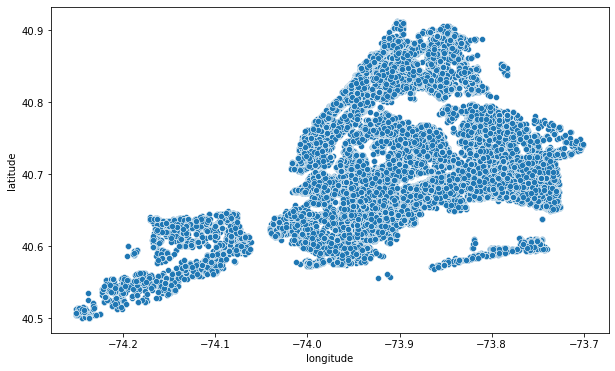

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_311.longitude,df_311.latitude)

C:\Users\ionad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='long', ylabel='lat'>

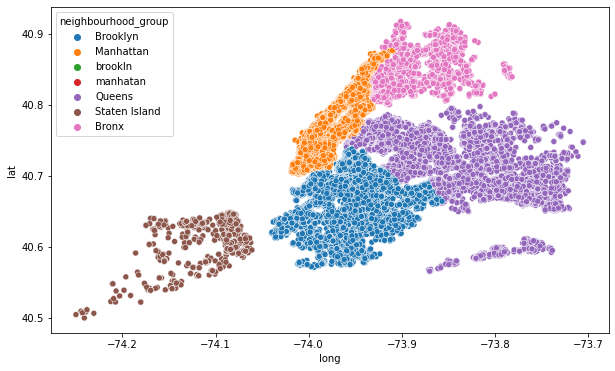

In [101]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.long,df.lat,hue=df.neighbourhood_group)

In [100]:
df_311.to_csv('../data/311_Noise_Complaints.csv', index=False) 

In [14]:
df_311 = df_311[['unique_key','created_date','complaint_type', 'descriptor', 'location_type', 'incident_address','latitude','longitude']]

In [70]:
df_311['Created Date']= pd.to_datetime(df_311['Created Date'], format='%m/%d/%Y %I:%M:%S %p')

In [12]:
len(df_311)

236159

In [20]:
df_311.complaint_type.unique()

array(['Noise - Street/Sidewalk', 'Noise - Vehicle', 'Noise - Helicopter',
       'Noise - Residential', 'Noise - Commercial', 'Noise',
       'Noise - Park', 'Noise - House of Worship'], dtype=object)

In [22]:
df_311 = df_311[df_311.complaint_type=='Noise - Residential']

In [25]:
df_311.descriptor.unique()

array(['Loud Music/Party', 'Loud Talking', 'Banging/Pounding',
       'Loud Television'], dtype=object)

In [11]:
df_311 = df_311[(df_311['created_date'] > '2022-06-07') & (df_311['created_date'] < '2022-09-07')]

In [ ]:
df_311.to_csv('../data/noise_complaints_residential_070622_070922.csv', index=False) 

In [78]:
df = pd.read_csv('../data/airbnb_open_data_full_clean.csv')

## Full dataset

In [4]:
df = pd.read_csv('../data/airbnb_open_data_full.csv')

C:\Users\ionad\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [39]:
df['has_fire_alarm'] = df.amenities.apply(lambda x: "Smoke alarm" in x)
df['has_co_monitor'] = df.amenities.apply(lambda x: "Carbon monoxide alarm" in x)

In [23]:
"Smoke_alarm" in df['amenities'].explode().astype(str)

False

In [42]:
pd.set_option('display.max_colwidth', 50)
df[['amenities','has_fire_alarm','has_co_monitor']]

,amenities,has_fire_alarm,has_co_monitor
0,"[""First aid kit"", ""Microwave"", ""Stove"", ""Coffe...",True,True
1,"[""Stove"", ""Coffee maker"", ""Long term stays all...",True,True
2,"[""Heating"", ""Kitchen"", ""Air conditioning"", ""Wi...",False,False
3,"[""Hair dryer"", ""Essentials"", ""Carbon monoxide ...",True,True
4,"[""Hair dryer"", ""Cable TV"", ""Refrigerator"", ""BB...",True,True
...,...,...,...
39876,"[""First aid kit"", ""Microwave"", ""Stove"", ""Coffe...",True,True
39877,"[""First aid kit"", ""Microwave"", ""Laundromat nea...",True,True
39878,"[""Hair dryer"", ""First aid kit"", ""Essentials"", ...",True,True
39879,"[""Pour-over coffee"", ""Coffee maker"", ""Long ter...",True,True


In [44]:
df[df['has_fire_alarm']]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_fire_alarm,has_co_monitor
0,2539,https://www.airbnb.com/rooms/2539,20220907064715,2022-09-07,city scrape,Clean & quiet apt home by the park,Renovated apt home in elevator building.<br />...,Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/3949d073-a02e...,2787,...,4.88,NaN,f,9,1,6,2,0.11,True,True
1,2595,https://www.airbnb.com/rooms/2595,20220907064715,2022-09-07,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.40,NaN,f,3,3,0,0,0.31,True,True
3,45910,https://www.airbnb.com/rooms/45910,20220907064715,2022-09-07,city scrape,Beautiful Queens Brownstone! - 5BR,"<b>The space</b><br />Beautiful, fully furnish...",NaN,https://a0.muscache.com/pictures/27117627/19ff...,204539,...,4.55,NaN,f,6,6,0,0,0.10,True,True
4,5136,https://www.airbnb.com/rooms/5136,20220907064715,2022-09-07,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,NaN,f,1,1,0,0,0.03,True,True
5,45935,https://www.airbnb.com/rooms/45935,20220907064715,2022-09-07,city scrape,Room in Beautiful Townhouse.,Single bedroom available in 3 bedroom apartmen...,NaN,https://a0.muscache.com/pictures/261278/104a6c...,204586,...,nan,NaN,t,1,0,1,0,nan,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39875,43458699,https://www.airbnb.com/rooms/43458699,20220907064715,2022-09-08,previous scrape,"Cozy, Comfortable, PRIVATE Bdrm in Spacious2Bd Ap",PRIVATE Bedroom in unique SPACIOUS 2Bd Apt<br ...,"EXCELLENT LOCATION<br />Garden St, between 2nd...",https://a0.muscache.com/pictures/686c7c0e-84b1...,40898359,...,nan,NaN,f,4,1,3,0,nan,True,True
39876,43728504,https://www.airbnb.com/rooms/43728504,20220907064715,2022-09-08,previous scrape,Private Modern House by The Beach,Private modern house by the Beach with all com...,Rockaway Beach is a neighborhood that gives it...,https://a0.muscache.com/pictures/6c950656-b090...,23049030,...,4.88,NaN,f,1,1,0,0,1.22,True,True
39877,44578886,https://www.airbnb.com/rooms/44578886,20220907064715,2022-09-08,previous scrape,Beautiful apartment - minutes to NYC,Our apartment is straight across the river fro...,Our apartment is located in a very interesting...,https://a0.muscache.com/pictures/dd5163c1-7e02...,48009648,...,4.85,NaN,f,1,1,0,0,2.12,True,True
39878,46355090,https://www.airbnb.com/rooms/46355090,20220907064715,2022-09-08,previous scrape,"1 Bedroom Basement, NEWLY Renovated",With easy access to multiple bus stops and the...,NaN,https://a0.muscache.com/pictures/64c81ee7-b396...,371552251,...,4.55,NaN,t,1,1,0,0,0.50,True,True


In [26]:
last_Scraped = '2022-09-07'

In [27]:
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20220907064715,2022-09-07,city scrape,Clean & quiet apt home by the park,Renovated apt home in elevator building.<br />...,Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/3949d073-a02e...,2787,...,5.00,4.75,4.88,NaN,f,9,1,6,2,0.11
1,2595,https://www.airbnb.com/rooms/2595,20220907064715,2022-09-07,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.80,4.81,4.40,NaN,f,3,3,0,0,0.31
2,5121,https://www.airbnb.com/rooms/5121,20220907064715,2022-09-07,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.31
3,45910,https://www.airbnb.com/rooms/45910,20220907064715,2022-09-07,city scrape,Beautiful Queens Brownstone! - 5BR,"<b>The space</b><br />Beautiful, fully furnish...",NaN,https://a0.muscache.com/pictures/27117627/19ff...,204539,...,5.00,4.82,4.55,NaN,f,6,6,0,0,0.10
4,5136,https://www.airbnb.com/rooms/5136,20220907064715,2022-09-07,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.67,5.00,NaN,f,1,1,0,0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39876,43728504,https://www.airbnb.com/rooms/43728504,20220907064715,2022-09-08,previous scrape,Private Modern House by The Beach,Private modern house by the Beach with all com...,Rockaway Beach is a neighborhood that gives it...,https://a0.muscache.com/pictures/6c950656-b090...,23049030,...,5.00,4.94,4.88,NaN,f,1,1,0,0,1.22
39877,44578886,https://www.airbnb.com/rooms/44578886,20220907064715,2022-09-08,previous scrape,Beautiful apartment - minutes to NYC,Our apartment is straight across the river fro...,Our apartment is located in a very interesting...,https://a0.muscache.com/pictures/dd5163c1-7e02...,48009648,...,4.96,4.81,4.85,NaN,f,1,1,0,0,2.12
39878,46355090,https://www.airbnb.com/rooms/46355090,20220907064715,2022-09-08,previous scrape,"1 Bedroom Basement, NEWLY Renovated",With easy access to multiple bus stops and the...,NaN,https://a0.muscache.com/pictures/64c81ee7-b396...,371552251,...,4.36,4.36,4.55,NaN,t,1,1,0,0,0.50
39879,698195550745703156,https://www.airbnb.com/rooms/698195550745703156,20220907064715,2022-09-08,city scrape,"Luxurious private waterfront terrace, 2BR 2BA Apt","This two bed, two bath apartment overlooking t...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,151487807,...,nan,nan,nan,NaN,f,1,1,0,0,nan


In [28]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [29]:
df = df[['id', 'name', 'host_id', 'host_name','neighbourhood_cleansed','neighbourhood_group_cleansed','latitude','longitude','room_type','price','calculated_host_listings_count']]

In [30]:
df

,id,name,host_id,host_name,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,price,calculated_host_listings_count
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,Brooklyn,40.65,-73.97,Private room,$299.00,9
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,Manhattan,40.75,-73.99,Entire home/apt,$175.00,3
2,5121,BlissArtsSpace!,7356,Garon,Bedford-Stuyvesant,Brooklyn,40.69,-73.96,Private room,$60.00,2
3,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Ridgewood,Queens,40.70,-73.90,Entire home/apt,$425.00,6
4,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Sunset Park,Brooklyn,40.66,-73.99,Entire home/apt,$275.00,1
...,...,...,...,...,...,...,...,...,...,...,...
39876,43728504,Private Modern House by The Beach,23049030,Ramón,Rockaway Park,Queens,40.58,-73.83,Entire home/apt,$157.00,1
39877,44578886,Beautiful apartment - minutes to NYC,48009648,Nathan,Upper West Side,Manhattan,40.78,-74.01,Entire home/apt,$108.00,1
39878,46355090,"1 Bedroom Basement, NEWLY Renovated",371552251,Sheraz,Bellerose,Queens,40.72,-73.72,Entire home/apt,$140.00,1
39879,698195550745703156,"Luxurious private waterfront terrace, 2BR 2BA Apt",151487807,Asser,Williamsburg,Brooklyn,40.71,-73.97,Entire home/apt,$400.00,1


In [38]:
# No duplicate rows
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,id,name,host_id,host_name,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,price,calculated_host_listings_count


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39881 non-null  int64  
 1   name                            39868 non-null  object 
 2   host_id                         39881 non-null  int64  
 3   host_name                       39831 non-null  object 
 4   neighbourhood_cleansed          39881 non-null  object 
 5   neighbourhood_group_cleansed    39881 non-null  object 
 6   latitude                        39881 non-null  float64
 7   longitude                       39881 non-null  float64
 8   room_type                       39881 non-null  object 
 9   price                           39881 non-null  object 
 10  calculated_host_listings_count  39881 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 3.3+ MB


In [47]:
pd.set_option('display.max_columns', None)
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,calculated_host_listings_count
count,39881.00,39868,39881.00,39831,39881,39881,39881.00,39881.00,39881,39881.00,39881.00
unique,nan,38695,nan,9478,244,5,nan,nan,4,nan,nan
top,nan,Water View King Bed Hotel Room,nan,Blueground,Bedford-Stuyvesant,Manhattan,nan,nan,Entire home/apt,nan,nan
freq,nan,30,nan,453,2779,16847,nan,nan,22761,nan,nan
mean,116230261671512624.00,NaN,131341969.28,NaN,NaN,NaN,40.73,-73.95,NaN,197.55,16.93
std,246519682242047360.00,NaN,145567413.67,NaN,NaN,NaN,0.06,0.06,NaN,353.33,59.60
min,2539.00,NaN,2438.00,NaN,NaN,NaN,40.50,-74.27,NaN,0.00,1.00
25%,16331969.00,NaN,13639385.00,NaN,NaN,NaN,40.69,-73.98,NaN,80.00,1.00
50%,38236832.00,NaN,59746634.00,NaN,NaN,NaN,40.72,-73.95,NaN,130.00,1.00
75%,52557797.00,NaN,223374565.00,NaN,NaN,NaN,40.76,-73.93,NaN,219.00,4.00


In [51]:
df[df.price==16500]

,id,name,host_id,host_name,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,calculated_host_listings_count
19208,37828926,Group Stay @ Northern Lights Mansion,1261480,Doungrat (Diane),Harlem,Manhattan,40.81,-73.95,Private room,16500.00,8


In [33]:
df.isnull().sum().sort_values(ascending=False)

host_name                         50
name                              13
calculated_host_listings_count     0
price                              0
room_type                          0
longitude                          0
latitude                           0
neighbourhood_group_cleansed       0
neighbourhood_cleansed             0
host_id                            0
id                                 0
dtype: int64

In [39]:
df["id"].is_unique

True

In [40]:
df[df.groupby(['host_id'])['host_name'].transform('nunique') > 1]

,id,name,host_id,host_name,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,price,calculated_host_listings_count


In [42]:
df.neighbourhood_group_cleansed.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [43]:
df.rename(columns={'neighbourhood_cleansed': 'neighbourhood', 'neighbourhood_group_cleansed': 'neighbourhood_group'}, inplace=True)

C:\Users\ionad\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [44]:
df

,id,name,host_id,host_name,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,calculated_host_listings_count
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,Brooklyn,40.65,-73.97,Private room,$299.00,9
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,Manhattan,40.75,-73.99,Entire home/apt,$175.00,3
2,5121,BlissArtsSpace!,7356,Garon,Bedford-Stuyvesant,Brooklyn,40.69,-73.96,Private room,$60.00,2
3,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Ridgewood,Queens,40.70,-73.90,Entire home/apt,$425.00,6
4,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Sunset Park,Brooklyn,40.66,-73.99,Entire home/apt,$275.00,1
...,...,...,...,...,...,...,...,...,...,...,...
39876,43728504,Private Modern House by The Beach,23049030,Ramón,Rockaway Park,Queens,40.58,-73.83,Entire home/apt,$157.00,1
39877,44578886,Beautiful apartment - minutes to NYC,48009648,Nathan,Upper West Side,Manhattan,40.78,-74.01,Entire home/apt,$108.00,1
39878,46355090,"1 Bedroom Basement, NEWLY Renovated",371552251,Sheraz,Bellerose,Queens,40.72,-73.72,Entire home/apt,$140.00,1
39879,698195550745703156,"Luxurious private waterfront terrace, 2BR 2BA Apt",151487807,Asser,Williamsburg,Brooklyn,40.71,-73.97,Entire home/apt,$400.00,1


In [70]:
df_group_neighbourhood = df.groupby(['host_id','neighbourhood'], as_index=False).size()
df_group_neighbourhood.rename(columns={'size': 'host_listings_neighbourhood_count'}, inplace=True)
df_group_neighbourhood_group = df.groupby(['host_id','neighbourhood_group'], as_index=False).size()
df_group_neighbourhood_group.rename(columns={'size': 'host_listings_neighbourhood_group_count'}, inplace=True)

In [73]:
df = df.merge(df_group_neighbourhood, on=['host_id','neighbourhood'], how='left')

In [75]:
df = df.merge(df_group_neighbourhood_group, on=['host_id','neighbourhood_group'], how='left')

In [77]:
df[df.calculated_host_listings_count!=df.host_listings_neighbourhood_group_count]

,id,name,host_id,host_name,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,calculated_host_listings_count,host_listings_neighbourhood_count,host_listings_neighbourhood_group_count
241,171978,Bright spacious brooklyn apt,820011,Ike,Crown Heights,Brooklyn,40.67,-73.95,Entire home/apt,94.00,2,1,1
446,269404,"Master Bedroom Avaliable, Astoria",1411399,Carlos,Astoria,Queens,40.77,-73.91,Private room,119.00,4,3,3
561,411918,"3 BR apartment Crown Heights, BKLYN",2050338,Verena Vogelbacher,Crown Heights,Brooklyn,40.67,-73.94,Entire home/apt,195.00,3,1,1
612,504437,The biggest small apt in Manhattan,2356449,Mariana,Lower East Side,Manhattan,40.72,-73.99,Entire home/apt,60.00,2,1,1
647,448048,"1 BR, Book it 1st then write me",1267021,Sharma,Jackson Heights,Queens,40.75,-73.88,Private room,99.00,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39841,558462883228268575,"Jersey City 1BR w/ Gym & W/D, nr PATH",107434423,Blueground,Tribeca,Manhattan,40.72,-74.04,Entire home/apt,266.00,453,34,420
39844,667537734708935834,"20 Mins to Manhattan, Free Street PARKING",455683614,Ǧani,Forest Park,Queens,40.68,-73.91,Entire home/apt,221.00,3,1,1
39862,10905293,Hoboken 1BR | Desk+WiFi | Near Hospitals | by GLS,30283594,Global Luxury Suites,West Village,Manhattan,40.74,-74.03,Entire home/apt,325.00,95,12,84
39864,17662555,AMAZING CITY VIEWS 15 min Times Sq 30Day minimum,23156390,Emily,Upper West Side,Manhattan,40.79,-74.01,Entire home/apt,171.00,4,2,2


In [65]:
test

,id,name,host_id,host_name,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,calculated_host_listings_count,size
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,Brooklyn,40.65,-73.97,Private room,299.00,9,9
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,Manhattan,40.75,-73.99,Entire home/apt,175.00,3,3
2,5121,BlissArtsSpace!,7356,Garon,Bedford-Stuyvesant,Brooklyn,40.69,-73.96,Private room,60.00,2,2
3,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Ridgewood,Queens,40.70,-73.90,Entire home/apt,425.00,6,6
4,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Sunset Park,Brooklyn,40.66,-73.99,Entire home/apt,275.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
39876,43728504,Private Modern House by The Beach,23049030,Ramón,Rockaway Park,Queens,40.58,-73.83,Entire home/apt,157.00,1,1
39877,44578886,Beautiful apartment - minutes to NYC,48009648,Nathan,Upper West Side,Manhattan,40.78,-74.01,Entire home/apt,108.00,1,1
39878,46355090,"1 Bedroom Basement, NEWLY Renovated",371552251,Sheraz,Bellerose,Queens,40.72,-73.72,Entire home/apt,140.00,1,1
39879,698195550745703156,"Luxurious private waterfront terrace, 2BR 2BA Apt",151487807,Asser,Williamsburg,Brooklyn,40.71,-73.97,Entire home/apt,400.00,1,1


In [68]:
test[test['calculated_host_listings_count']!=test['size']]

,id,name,host_id,host_name,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,calculated_host_listings_count,size


In [45]:
# Clean price
df["price"] = df["price"].apply(
    lambda x: x.replace("$", "") if pd.isna(x) == False else x
)
df["price"] = df["price"].apply(
    lambda x: x.replace(",", "") if pd.isna(x) == False else x
)  # Some prices have commas
df["price"] = df["price"].astype(float)

<ipython-input-45-46d275acea16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = df["price"].apply(
<ipython-input-45-46d275acea16>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = df["price"].apply(
<ipython-input-45-46d275acea16>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [46]:
df

,id,name,host_id,host_name,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,calculated_host_listings_count
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,Brooklyn,40.65,-73.97,Private room,299.00,9
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,Manhattan,40.75,-73.99,Entire home/apt,175.00,3
2,5121,BlissArtsSpace!,7356,Garon,Bedford-Stuyvesant,Brooklyn,40.69,-73.96,Private room,60.00,2
3,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Ridgewood,Queens,40.70,-73.90,Entire home/apt,425.00,6
4,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Sunset Park,Brooklyn,40.66,-73.99,Entire home/apt,275.00,1
...,...,...,...,...,...,...,...,...,...,...,...
39876,43728504,Private Modern House by The Beach,23049030,Ramón,Rockaway Park,Queens,40.58,-73.83,Entire home/apt,157.00,1
39877,44578886,Beautiful apartment - minutes to NYC,48009648,Nathan,Upper West Side,Manhattan,40.78,-74.01,Entire home/apt,108.00,1
39878,46355090,"1 Bedroom Basement, NEWLY Renovated",371552251,Sheraz,Bellerose,Queens,40.72,-73.72,Entire home/apt,140.00,1
39879,698195550745703156,"Luxurious private waterfront terrace, 2BR 2BA Apt",151487807,Asser,Williamsburg,Brooklyn,40.71,-73.97,Entire home/apt,400.00,1


TO DO:
- Remove duplicates  
- Fix neighbourhood group and make it categories?
- Cancellation policy to categorical
- Room type to categorical
- Convert constuction year to int/ date (year)
- Price/ service fee remove dollars, spaces and convert to float- check min/max/mean
- Minimum nights to int- some of them are unreasonable, to look at more closely
- Last review to date- check range- unrealistic values, lots of nulls, should we use?
- Reviews per month to float- lots of missing, some have 30+ month, how many? Likely this place has multiple rooms
- Review rate to ordinal?
- calculated_host_listings_count to int
- what is the meaning of availability_365? to int? Check realistic values
- House rules and name- word cloud
- Handle only rows with license

NOTES:
- Some NAMEs are null
- Also host name- not unique. Seems there is one host ID with multiple names- not sure why (29531702698)
- neighbourhood- probably won't use, harder to clean
- number of reviews- some have tons- are these the really good ones or the really bad ones?
- Plot lat/ long on map- nice example here https://leo-you.github.io/Airbnb-Availability-Prediction/
- What is availability 365/ review rate number? See the above notebook uses lower availability as being more popular
- Extra datasets
- Appropriate literature
- Current situation: https://www.aei.org/op-eds/new-york-city-goes-to-war-against-airbnb/, https://www.thrillist.com/news/new-york/nyc-new-strict-airbnb-rental-regulations
- Is this only New York City?

POTENTIAL QUESTIONS FOR RESEARCH (DIFF SCOPE)
- What makes a successful airbnb host? Location?
- Where are most of the properties listed and where is the busiest areas? User looking to buy new airbnb property
- What type of rooms are most popular?
- How are different area/neighbourhood affect the listing property price and demands?
- Are large airbnb owners properties all in the same place on the map?
- What are the most important factors when customer choose an airbnb property?
    - Price
    - Location
    - Room Type
    - Customer Review
- Could also compare to other locations outside of New York- https://www.wsj.com/articles/what-its-really-like-to-be-an-airbnb-landlord-11576465501
- Cleaning fees now to be added to total price https://www.nytimes.com/2022/11/07/business/airbnb-cleaning-fees.html
- Info for normal people about their local area- housing shortage

In [409]:
len(df)

102599

In [24]:
df.groupby('host_id').count('id')

TypeError: count() takes 1 positional argument but 2 were given

In [23]:
df

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.65,-73.97,United States,...,$193,10.00,9.00,10/19/2021,0.21,4.00,6.00,286.00,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75,-73.98,United States,...,$28,30.00,45.00,5/21/2022,0.38,4.00,2.00,228.00,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.81,-73.94,United States,...,$124,3.00,0.00,NaN,nan,5.00,1.00,352.00,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.69,-73.96,United States,...,$74,30.00,270.00,7/5/2019,4.64,4.00,1.00,322.00,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.80,-73.94,United States,...,$41,10.00,9.00,11/19/2018,0.10,3.00,1.00,289.00,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.71,-73.95,United States,...,$169,1.00,0.00,NaN,nan,3.00,1.00,227.00,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80,-73.97,United States,...,$167,1.00,1.00,7/6/2015,0.02,2.00,2.00,395.00,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.68,-73.98,United States,...,$198,3.00,0.00,NaN,nan,5.00,1.00,342.00,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.75,-73.94,United States,...,$109,2.00,5.00,10/11/2015,0.10,3.00,1.00,386.00,NaN,NaN


## Remove duplicates

In [410]:
len(df[df.duplicated()]) # Number of duplicates to remove

541

In [411]:
df.drop_duplicates(keep='first', inplace=True)

In [412]:
len(df) # Duplicate rows dropped

102058

In [413]:
df[~df.license.isnull()]

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
11114,7139598,"Cozy 1 BR on Bedford Avenue, Wburg",73023181304,verified,Christina,Brooklyn,Williamsburg,40.72,-73.96,True,strict,Private room,2010.00,$702,$140,1.00,1.00,1/3/2016,0.02,1.00,1.00,191.00,"Dear Guest, Thank you for appreciating that I ...",41662/AL
72947,41289964,"Cozy 1 BR on Bedford Avenue, Wburg",25804773951,unconfirmed,Christina,Brooklyn,Williamsburg,40.72,-73.96,True,flexible,Private room,2010.00,$702,$140,1.00,1.00,1/3/2016,0.02,1.00,1.00,0.00,NaN,41662/AL


In [414]:
# dropping duplicate license row- keeping one with more information
df.drop(df.index[72947],inplace=True)

In [415]:
df.shape

(102057, 24)

In [416]:
df = df.drop(['license'], axis=1) # Only populated for duplicate row

## Fix neighbourhood groups

In [420]:
df['neighbourhood_group'].value_counts() # Typos

Manhattan        43557
Brooklyn         41629
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
manhatan             1
Name: neighbourhood_group, dtype: int64

In [421]:
df['neighbourhood_group'].replace(['manhatan','brookln'],['Manhattan','Brooklyn'],inplace=True)
df['neighbourhood_group'].value_counts()

Manhattan        43558
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
Name: neighbourhood_group, dtype: int64

In [422]:
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category') # Setting as category column

## Cancellation policy, room type, host identify verified to categorical

In [423]:
df['cancellation_policy'] = df['cancellation_policy'].astype('category') # Setting as category column
df['room_type'] = df['room_type'].astype('category')
df['host_identity_verified'] = df['host_identity_verified'].astype('category')

## Construction year to int

In [424]:
df['construction_year'] = df['construction_year'].astype('Int64')

## Clean price and service fee

In [425]:
df['price']=df['price'].apply(lambda x: x.replace('$','') if pd.isna(x) == False else x)
df['service_fee']=df['service_fee'].apply(lambda x: x.replace('$','') if pd.isna(x) == False else x)
df['service_fee']=df['service_fee'].astype(float)
df['price']=df['price'].apply(lambda x: x.replace(',','') if pd.isna(x) == False else x) # Some prices have commas 
df['price']=df['price'].astype(float)

In [49]:
df[['price']].describe()

,price
count,39881.00
mean,197.55
std,353.33
min,0.00
25%,80.00
50%,130.00
75%,219.00
max,16500.00


## Plot neighbourhoods

C:\Users\ionad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='long', ylabel='lat'>

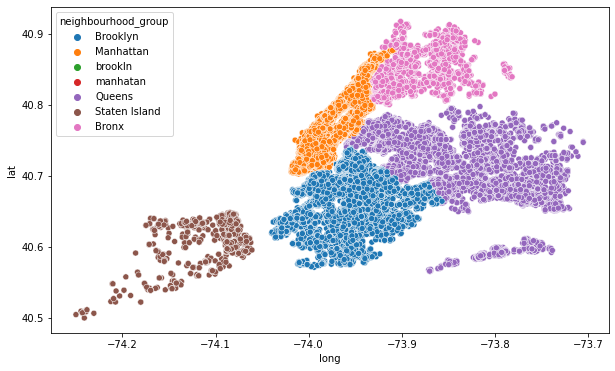

In [417]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.long,df.lat,hue=df.neighbourhood_group)

C:\Users\ionad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='long', ylabel='lat'>

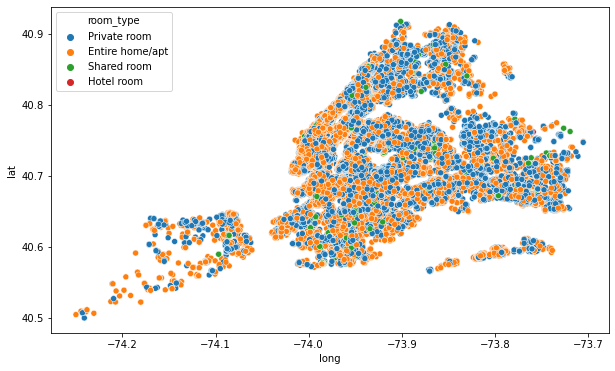

In [418]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.long,df.lat,hue=df.room_type)

C:\Users\ionad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='long', ylabel='lat'>

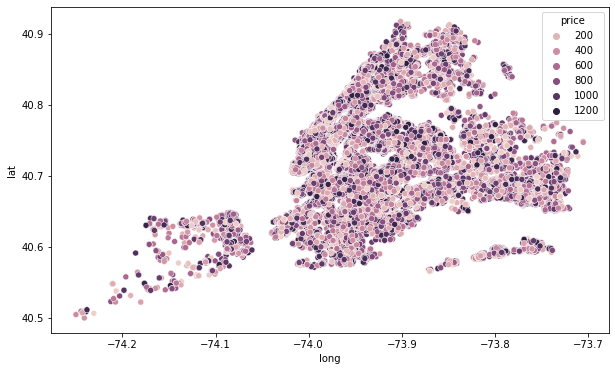

In [472]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.long,df.lat,hue=df.price)

## Minimum nights

In [427]:
df['minimum_nights'] = df['minimum_nights'].astype('Int64')

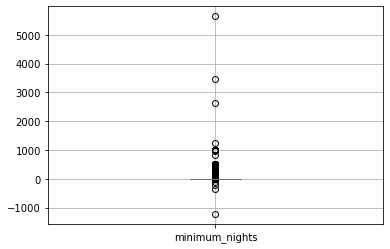

In [428]:
df.boxplot(column='minimum_nights', return_type='axes'); # Anything below 0 and above 2000 doesn't seem reasonable

In [429]:
len(df)-df['minimum_nights'].isnull().sum()

101657

In [430]:
df['minimum_nights'].replace({pd.NA: np.nan}, inplace = True)

In [431]:
df['minimum_nights'] = np.where(df['minimum_nights']<0, np.nan, df['minimum_nights'])
df['minimum_nights'] = np.where(df['minimum_nights']>2000, np.nan, df['minimum_nights'])

In [432]:
len(df)-df['minimum_nights'].isnull().sum()

101641

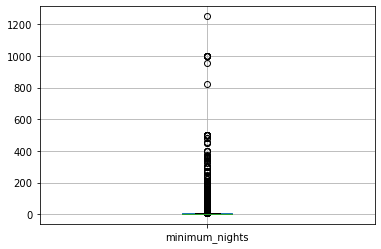

In [433]:
df.boxplot(column='minimum_nights', return_type='axes');

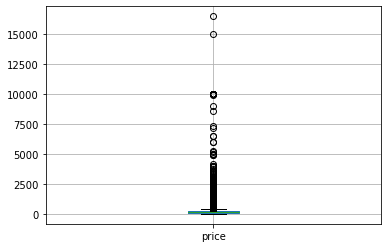

In [50]:
df.boxplot(column='price', return_type='axes');

## Last review date

In [434]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['last_review'].min(), df['last_review'].max() # Max is not realistic

(Timestamp('2012-07-11 00:00:00'), Timestamp('2058-06-16 00:00:00'))

In [435]:
df['last_review'] = np.where(df['last_review']>datetime.now(), np.datetime64('NaT'), df['last_review'])

In [436]:
df['last_review'].min(), df['last_review'].max()

(Timestamp('2012-07-11 00:00:00'), Timestamp('2022-05-21 00:00:00'))

In [437]:
len(df)-df['last_review'].isnull().sum() # A lot of nulls

86220

## Reviews per month 

In [438]:
df['number_of_reviews'] = df['number_of_reviews'].astype('Int64')

In [439]:
df['number_of_reviews'].replace({pd.NA: np.nan}, inplace = True)

In [440]:
len(df[df['reviews_per_month']>30]) # 11 places with on average more than 30 reviews per month

11

## Review rate, host listing count and availability to int

In [441]:
df['review_rate_number'] = df['review_rate_number'].astype('Int64')
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].astype('Int64')
df['availability_365'] = df['availability_365'].astype('Int64')

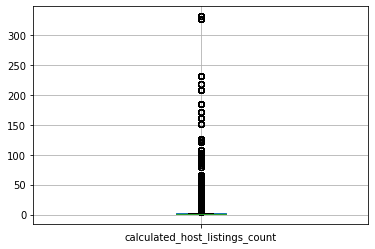

In [442]:
df.boxplot(column='calculated_host_listings_count', return_type='axes');

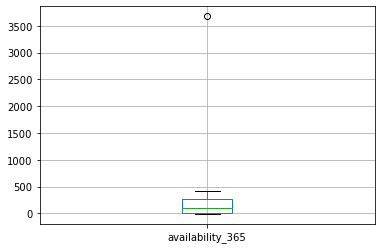

In [443]:
df.boxplot(column='availability_365', return_type='axes');# What is this?

## String columns

In [336]:
#get the words to perform the the words cloud
text = " ".join(review for review in df[~df.name.isna()].name.astype(str))
print ("There are {} words in the combination of all cells in column name.".format(len(text)))

There are 3927447 words in the combination of all cells in column name.


In [337]:
wordcloud = WordCloud().generate(text)

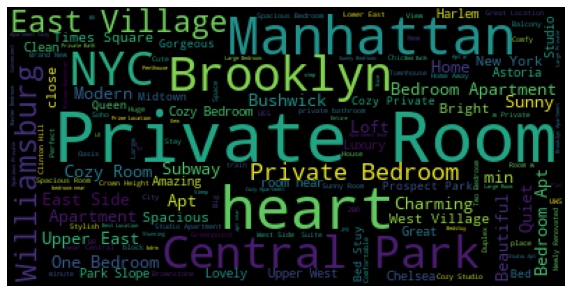

In [338]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [339]:
#get the words to perform the the words cloud
text = " ".join(review for review in df[~df.house_rules.isna()].house_rules.astype(str))
print ("There are {} words in the combination of all cells in column house_rules.".format(len(text)))

There are 14415426 words in the combination of all cells in column house_rules.


In [340]:
wordcloud2 = WordCloud().generate(text)

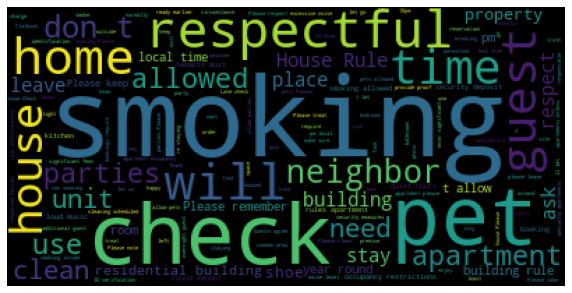

In [341]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

## Visualisations

price
service_fee
minimum_nights
number_of_reviews
review_rate_number
availability_365


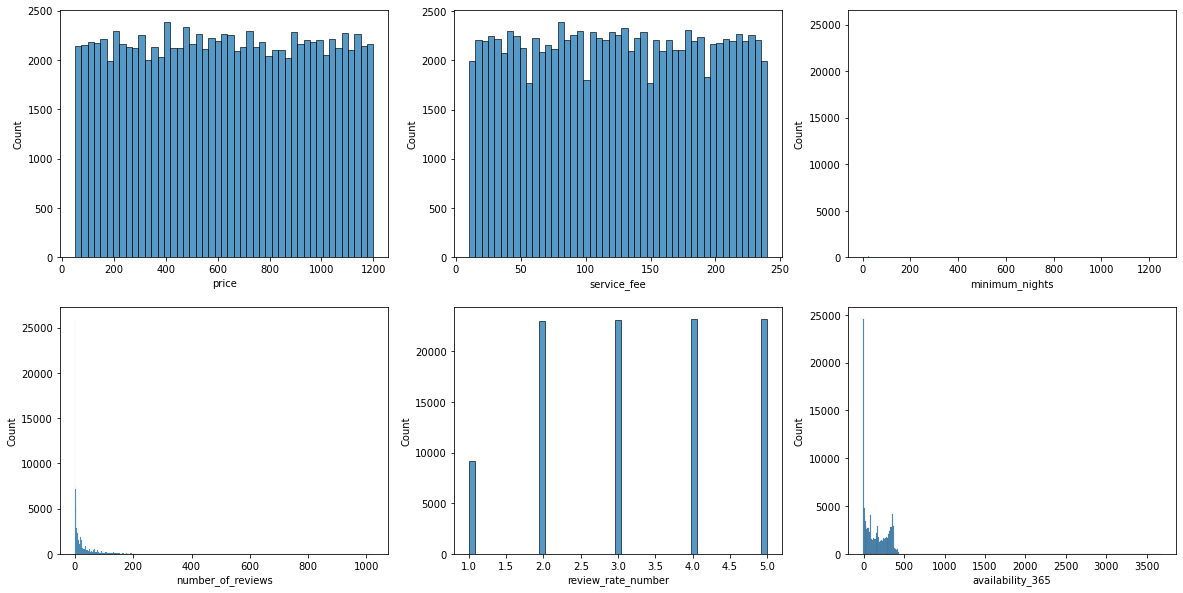

In [343]:
columns = ['price', 'service_fee', 'minimum_nights','number_of_reviews','review_rate_number', 'availability_365']
fig,ax = plt.subplots(2,3, figsize = (20,10));
ax =ax.flatten()
for i in range(len(columns)):
    sns.histplot(df[columns[i]].astype(float),ax = ax[i]);

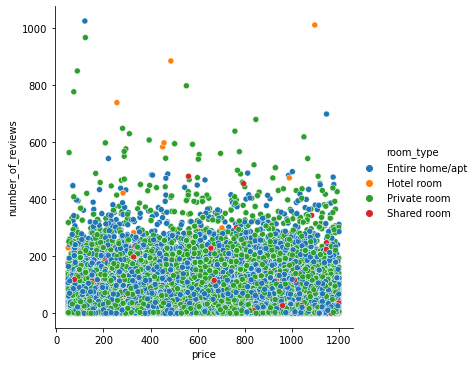

In [344]:
sns.relplot(data=df, kind='scatter', x='price', y='number_of_reviews', hue='room_type');

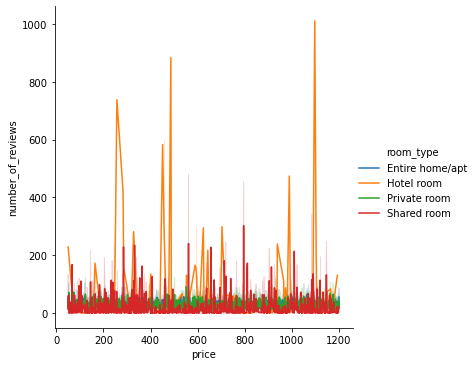

In [350]:
sns.relplot(data=df, kind='line', x='price',  y='number_of_reviews', hue='room_type');

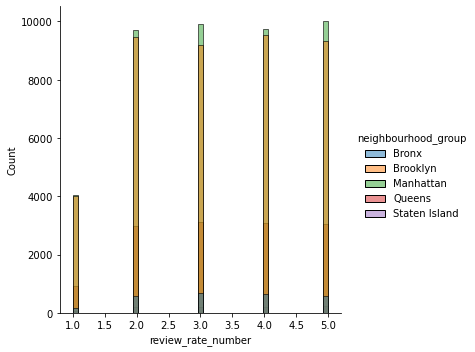

In [351]:
sns.displot(kind="hist",data=df, x='review_rate_number', hue='neighbourhood_group');

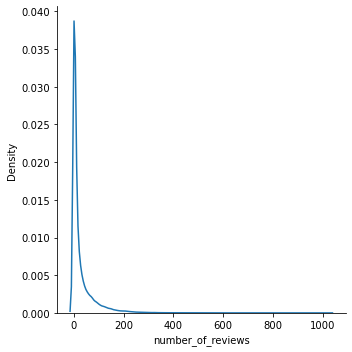

In [352]:
sns.displot(kind="kde",data=df, x='number_of_reviews');

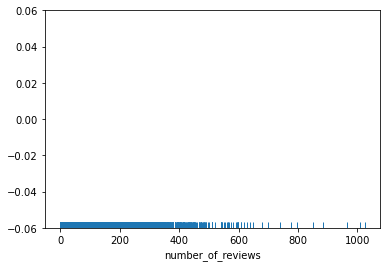

In [353]:
sns.rugplot(data=df, x='number_of_reviews');

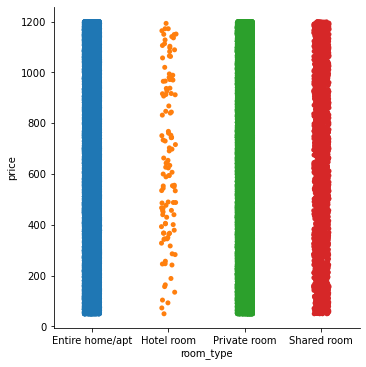

In [355]:
sns.catplot(kind="strip",data=df, x='room_type', y='price');

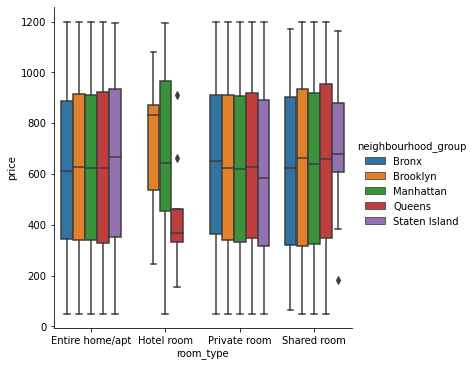

In [356]:
sns.catplot(kind="box",data=df, x='room_type', y='price', hue='neighbourhood_group');

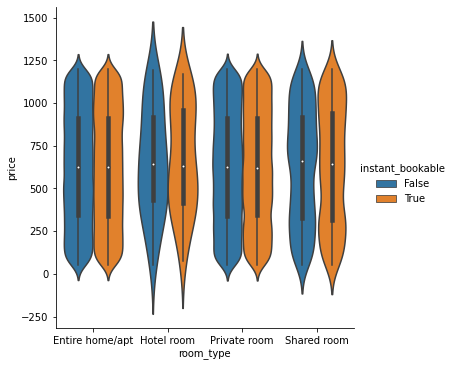

In [357]:
sns.catplot(kind="violin",data=df, x='room_type', y='price', hue='instant_bookable');

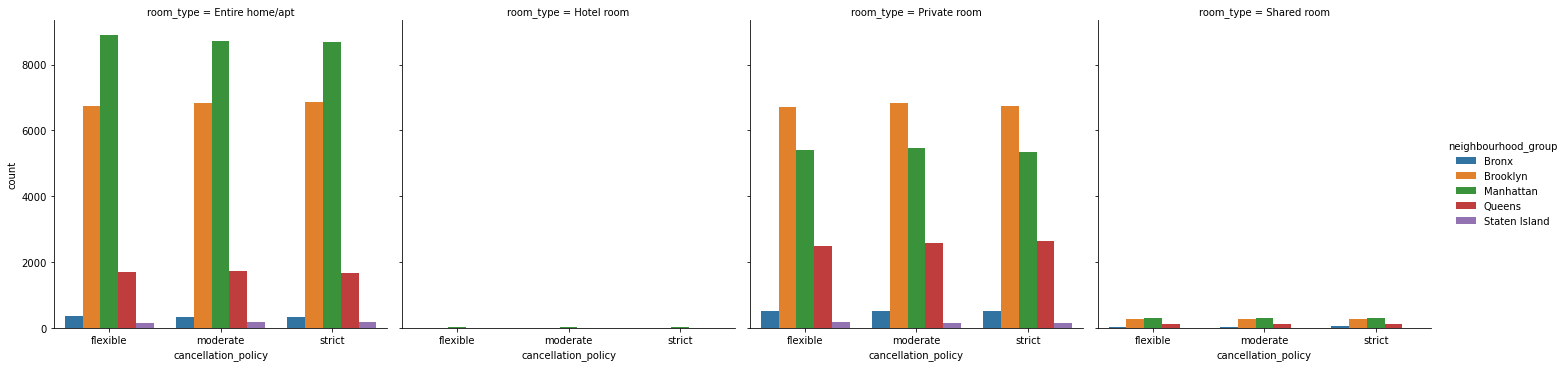

In [359]:
sns.catplot(data=df, kind='count', x='cancellation_policy', col='room_type', hue='neighbourhood_group');

## TO DO

**Exercise 1 – Goal - Data (Domain specific)**   
We will be following the nested model presented in the lectures for the visualization design process.  So the 
first  step  is  to  understand  the  domain  situation  and  formulate  the  goal  of  the  visualization.  You  need  to  
identify by yourself what user and goal you want to work on. We are in a visualization course so the main 
goal should suit a visualization solution.  

(Introduction) Describe what you envision will be the general overall goal and users of the visualization tool. 
The goal is meant to be from the perspective of the user, which will be the goal/question from the user’s 
perspective to use the visualization tool.  Think about the different goals of visualization presented in class 
and the high-level actions. Define for which users your tool is meant,  and which overall goal. The reason 
why this goal is suitable for the available data and why this is a goal where a visualization tool is the right 
means to solve it (e.g., visualization vs. an automatic solution). 

**Exercise 2 – Data (What) Domain specific**  
(a) Write in section What (Data) the description of the data. You can base it on the analysis you have done 
in exercise 1. What are the general properties of the data you want to use?  
(b) Most  of  the  data  sets  contain  noise,  missing  data  values,  and  relations,  or  measurement  errors.  The  
data of this course is no exception. In exercise 1, you already looked at the missing values. How will you 
handle missing data values or measurement errors? Think of multiple ways and their pros and cons.   
(c) (Data (What)) Choose one of the methods and implement it for the data set. Describe it in the section 
and mention what is the effect on the data. 

**Exercise 3 – Data (What) Abstraction**  
Once the goal, and data are understood from the domain point of view. We enter into the abstraction phase 
such that we can identify the most adequate designs later on. 
Make the data abstraction according to the “what” in Munzner’s framework. Present it in a summarized 
version you do not need to present it for each individual attribute. Build a table with the general overview. 

Goal: New York resident interested in impact of airbnb in their neighbourhood/ neighbourhood group.

Combination of exploration and analysis (verification of hypotheses)

Summary of data not readily accessible. Visualisation is appropriate to find patterns and focus on the detail of their neighbourhood.

In [397]:
pd.set_option('display.max_colwidth', 50)
df[(df.house_rules.str.contains('cops', na=False)) & (~df.house_rules.str.contains('All Renters and Guests must be 25 years of age unless accompanied by a parent or guardian. Parties of any kind are not allowed.', na=False))  & (~df.house_rules.str.contains('6.25% MA State Sales Tax is already incorporated into the room rate and extra guest fees.', na=False))].house_rules

Series([], Name: house_rules, dtype: object)

Questions New Yorkers have about Airbnb:
- How much is a landlord in your area making with an airbnb compared to average rent? https://www.reddit.com/r/nyc/comments/2t5x49/airbnb_blamed_for_rising_housing_costs_in_nyc/
- How many airbnbs in your area seem to be permanent airbnbs/ full homes and apartments? Scary always seeing strangers and driving up rent https://www.reddit.com/r/nyc/comments/3fi88n/new_york_city_cracking_down_on_airbnb/, https://www.reddit.com/r/nyc/comments/2dub9b/airbnbs_threat_to_affordable_housing_the_website/
- Are airbnbs in your area mom and pop establishments? If have multiple whole house/apartment or far away from each other then probably absentee landlord (not mom and pop) https://www.theguardian.com/commentisfree/2016/oct/17/airbnb-rent-unaffordable-elizabeth-warren-neighborhoods
- Are there sound rules in the airbnbs in my area? Check house_rules, can also correlate this dataset of noise complaints with our dataset https://data.cityofnewyork.us/widgets/p5f6-bkga?mobile_redirect=true
- Where are the airbnbs in my area? Are they long term/ short term? Person who didn't know about airbnbs in building before moving in- safety issues, noise annoyance, no community https://www.reddit.com/r/nyc/comments/3fi88n/new_york_city_cracking_down_on_airbnb/
- How popular are the airbnbs in your area? If busy with rich people then maybe this is a boost to the economy https://www.reddit.com/r/nyc/comments/2dub9b/airbnbs_threat_to_affordable_housing_the_website/ The potential benefit of increased tourism supporting city economies is much smaller than commonly advertised. There is little evidence that cities with an increasing supply of short-term Airbnb rental accommodations are seeing a large increase in travelers. Instead, accommodations supplied via Airbnb seem to be a nearly pure substitution for other forms of accommodation. Two surveys indicate that only 2 to 4 percent of those using Airbnb say that they would not have taken the trip were Airbnb rentals unavailable. https://www.epi.org/publication/the-economic-costs-and-benefits-of-airbnb-no-reason-for-local-policymakers-to-let-airbnb-bypass-tax-or-regulatory-obligations/
Studies claiming that Airbnb is supporting a lot of economic activity often vastly overstate the effect because they fail to account for the fact that much of this spending would have been done anyway by travelers staying in hotels or other alternative accommodations absent the Airbnb option. But maybe they would have stayed in a different neighbourhood?
- Which neighbourhoods are most affected?the majority of those units are in just a few neighborhoods: Lower East Side, East Village, Williamsburg. While the impact on the market overall might be small, I think anyone living in one of those areas can tell you that there are a lot of professional Airbnb operations, and they definitely have an outsized effect on available rentals there. I think there are two reasons why those neighborhoods are favored. In addition to being trendy areas where tourists want to be, they also have mostly non-doorman walkup buildings, which are necessary if you plan on violating your lease by running an Airbnb. https://www.reddit.com/r/nyc/comments/4qsnxx/airbnb_listings_are_taking_up_10_of_vacant/
- How long do airbnb guests stay? At least minimum number of days, how long do they have to make trouble https://www.reddit.com/r/nyc/comments/4qsnxx/airbnb_listings_are_taking_up_10_of_vacant/
- How much has rent climbed because of airbnb? Not sure if we can say this https://www.reddit.com/r/nyc/comments/bg1wfd/highquality_studies_indicate_that_airbnb/
- How many rental properties are available in my area compared to number of airbnb properties (permanent)? https://www.reddit.com/r/nyc/comments/bg1wfd/highquality_studies_indicate_that_airbnb/ https://www.curbed.com/2022/05/new-york-more-airbnb-listings-apartments-rentals.html Not sure if we have the full dataset so worth checking if this data is reliable
- How are airbnbs advertised in your area? Grungy/ hip for lower income?
- Investigation into people who own lots of airbnbs, where, are they popular? Not mom and pop https://nypost.com/2022/11/04/nyc-proposes-strict-airbnb-registration-rules-to-take-effect-in-january/ how much?- in black neighbourhoods, owners 75% likely to be white https://www.alternativetravelers.com/airbnb-effect/, http://insideairbnb.com/research/face-of-airbnb-nyc/, https://sfmn.fiu.edu/data-shows-that-airbnb-listings-are-contributing-to-further-nyc-gentrification/#:~:text=Business-,Data%20show%20Airbnb%20listings%20are,NYC%20gentrification%20(with%20multimedia%20content)&text=Airbnb%20listings%20in%20gentrifying%20New,New%20Yorkers%20are%20familiar%20with. https://ny.curbed.com/2017/8/4/16099252/new-york-neighborhood-affordability

- How do airbnbs differ to hotels in terms of tax payments? How much cash is the council not collecting from the move to airbnbs instead of hotels? https://www.reddit.com/r/nyc/comments/jl0099/airbnb_costs_nyc_renters_178m_per_year_upenn_study/ https://www.epi.org/publication/the-economic-costs-and-benefits-of-airbnb-no-reason-for-local-policymakers-to-let-airbnb-bypass-tax-or-regulatory-obligations/
    
    
Is the issue properties that are:
- always rented- lots of people staying
- whole property- house/apartment
- long-term- min. more than 30 days?

Any room/ apartment that is exclusively used for airbnb (avg. more than 10 reviews a month or min. bigger than 30 likely is taking a property that could be available to a long term renter off the market. https://www.reddit.com/r/nyc/comments/urvwyo/new_york_now_has_more_airbnb_listings_than/

Are lots of new builds being used for airbnb or is it mainly older buildings? i.e. are disproprortionate amounts of new builds going to short term rental market?

TO DECIDE

General examples
https://www.reddit.com/r/nyc/comments/2g8duu/someone_altered_the_airbnb_ad_in_the_subway/
PROS and CONS in research https://scholar.harvard.edu/files/sophie-qingzhen-wang/files/calder-wang_sophie_harvard_airbnb_housing.pdf

TO DO- check Kaggle dataset identical to online dataset

In [396]:
df[df.house_rules.str.contains('House Rules 1. Check-in is 4 pm local time.', na=False)]

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
560,1310624,Williamsburg Exposed Brick Loft,29998285923,unconfirmed,Robert,Brooklyn,Williamsburg,40.71,-73.97,True,moderate,Entire home/apt,2012,680.00,136.00,14.00,31.00,2019-05-26,0.33,4,1,425,House Rules 1. Check-in is 4 pm local time. If...
562,1311729,Central Bedford Avenue Apartment,64293042107,verified,Sienna,Brooklyn,Williamsburg,40.72,-73.96,False,flexible,Entire home/apt,2022,357.00,71.00,3.00,14.00,2015-08-31,0.15,5,1,138,House Rules 1. Check-in is 4 pm local time. If...
773,1428264,Beautiful lrg 1800's syle apt share,36013124438,unconfirmed,Miller,Brooklyn,Greenpoint,40.73,-73.96,True,moderate,Private room,2016,213.00,43.00,7.00,15.00,2019-06-08,0.25,1,3,3,House Rules 1. Check-in is 4 pm local time. If...
867,1480180,"Private Room in Artist's Home, Stapleton, SI",96774911627,unconfirmed,Russell,Staten Island,Clifton,40.62,-74.08,True,moderate,Private room,2014,1174.00,235.00,1.00,50.00,2019-06-03,0.56,3,1,118,House Rules 1. Check-in is 4 pm local time. If...
873,1483494,COMFORTABLE ROOM,24837497743,unconfirmed,Farrell,Manhattan,East Harlem,40.79,-73.94,True,moderate,Private room,2016,481.00,96.00,3.00,216.00,2019-05-14,2.44,5,1,279,House Rules 1. Check-in is 4 pm local time. If...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101475,57045979,Large comfortable room near Penn Station,22035713472,verified,Greg,Manhattan,Chelsea,40.75,-73.99,True,flexible,Private room,2013,189.00,38.00,1.00,136.00,2019-06-21,4.62,4,4,61,House Rules 1. Check-in is 4 pm local time. If...
101490,57054263,Amazing apartment in Manhattan,11044606492,verified,Chester,Manhattan,Theater District,40.76,-73.99,True,moderate,Private room,2009,707.00,141.00,3.00,0.00,NaT,nan,1,1,0,House Rules 1. Check-in is 4 pm local time. If...
101505,57062548,"15 Minutes to Manhattan, Heart of Astoria",41826042432,verified,Ero,Queens,Ditmars Steinway,40.78,-73.91,True,moderate,Private room,2020,602.00,120.00,1.00,5.00,2019-06-27,4.69,5,2,31,House Rules 1. Check-in is 4 pm local time. If...
101510,57065309,Colorful 1 Bedroom in the Heart of the E. Village,67569856388,verified,Tamarinda,Manhattan,East Village,40.73,-73.99,True,moderate,Entire home/apt,2009,337.00,67.00,30.00,2.00,2017-09-01,0.08,5,1,0,House Rules 1. Check-in is 4 pm local time. If...


In [392]:
pd.set_option('display.max_colwidth', 50)
test = df.groupby('house_rules')['host_id'].unique().to_frame().reset_index()
test['Length'] = test['host_id'].str.len()

In [394]:
# So are all these host IDs actually the same person?
test.sort_values('Length')

,house_rules,host_id,Length
273,"16 nights minimum stay, no smoking or pets.",[79871338425],1
264,"13 nights minimum stay, no smoking or pets.",[90295945190],1
266,14 nights minimum stay No pets at any time No ...,[58695484092],1
267,"14 nights minimum stay, no smoking or pets.",[64515543591],1
269,15 guest maximum. Smoking isn't permitted and...,[84365673920],1
...,...,...,...
1401,Please remember that this is a residential bui...,"[25554233693, 48327323941, 14322825094, 721879...",552
768,No Smoking No Pets,"[17916840650, 12400458941, 16023186083, 178770...",807
1397,Please remember that this is a residential bui...,"[21048079300, 14904883782, 42275596201, 443677...",881
548,House Rules 1. Check-in is 4 pm local time. If...,"[29998285923, 64293042107, 36013124438, 967749...",901
